<a href="https://colab.research.google.com/github/abderrahimJK/regression-model_multiple_polynomiale/blob/main/TP2_R%C3%A9gression_multiple_et_polynomiale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path_var = 'drive/MyDrive/ML-Buoihi/'

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
df = pd.read_csv(path_var+"udemy_courses.csv")

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [17]:
# Drop the id and date columns
df = df.drop(['course_id', 'url','is_paid','level','subject','course_title','published_timestamp' ], axis=1)

In [18]:
df.head()

,price,num_subscribers,num_reviews,num_lectures,content_duration
0,200,2147,23,51,1.5
1,75,2792,923,274,39.0
2,45,2174,74,51,2.5
3,95,2451,11,36,3.0
4,200,1276,45,26,2.0


In [20]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

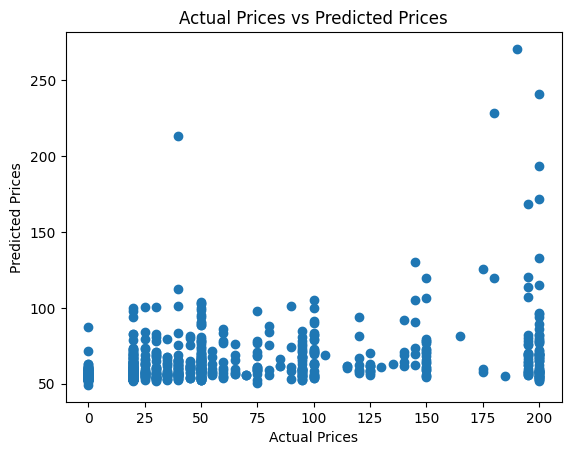

In [25]:
# Fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the prices of the courses in the test set
y_pred = model.predict(X_test)

# Plot the actual prices and predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()